# Wine Classification
In this dataset, instead of trying to predict the quality of the wine based on it's characteristics, we'll be trying to distinguish red wine vs. white wine. You should already have the red wine dataset, go into the class data folder for the white wine dataset.

To upload your dataset, open up the menu on the left side of the screen, click the "files" tab, and click the upload icon.

In [1]:
'''
A bunch of imports.

The csv library is for reading ".csv" files (things like spreadsheets)
keras is our main library for machine learning
numpy is short for number python, and it's a really nice library for all things
mathematical.

Mattplotlib.pyplot is plotting software we'll be using.
'''
import csv
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Processing Data

In [0]:
'''
This is a function I wrote to read csv files.
Understanding this isn't too important; please skip over it for now.
'''
def read_csv(file_name):
  data = []
  
  with open(file_name) as file:
    header = file.readline()
    
    def readline(string):
      string = string.replace('"', '')
      string = string.replace('\n', '')
      array = string.split(';')
      
      return array
    
    header = readline(header)
    
    for line in file:
      data_point = readline(line)
      data_point = [(float)(number) for number in data_point]
      data.append(data_point)
  
  return header, data

def display(header, data):
  import pandas as pd
  import copy
  total_data = [[header[i] for i in range(len(header))]] + copy.deepcopy(data)
  df = pd.DataFrame(total_data)
  print(df.head())

Let's parse the data and understand it:

In [0]:
'''
Here's our data. white_wine is a 2D list:
 
[[a0, a1, a2, a3, a4, a5, ..., a11],
 [b0, b1, b2, b3, b4, b5, ..., b11],
 [c0, c1, c2, c3, c4, c5, ..., c11], ...]

In this situation, each row [a0, a1, ..., a12] represents an example of a bottle of wine.
Each column a0, b0, c0, ..., etc. represents a "feature" or an aspect of that wine.

For example, a0 represents the "fixed acidity" of the first example. b0 represents
the "fixed acidity" of the second example, etc.
'''

header, white_wine = read_csv("white_wine.csv")
header, red_wine = read_csv("red_wine.csv")

In [4]:
'''
Just displaying our data
'''

display(header, white_wine)
display(header, red_wine)

              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1              7              0.27         0.36            20.7      0.045   
2            6.3               0.3         0.34             1.6      0.049   
3            8.1              0.28          0.4             6.9       0.05   
4            7.2              0.23         0.32             8.5      0.058   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                   45                   170    1.001     3       0.45   
2                   14                   132    0.994   3.3       0.49   
3                   30                    97   0.9951  3.26       0.44   
4                   47                   186   0.9956  3.19        0.4   

        10       11  
0  alcohol  quality  
1      8.8        6  
2      9.5        6 

In [0]:
'''
Now we concatenate the two datasets and make a corresponding "answers" list. 
A value of 0 means "not red wine" and a value of 1 means "red wine"
'''

'''
data is a 2D array containing all the elements of white_wine and red_wine
The order is preserved, so first it's the elements of white_wine and then the
elements of red_wine
'''
data = white_wine + red_wine

'''
We make a corresponding answers array. The answer to data[i] is answers[i]. And
answers[i] is either [0] if the wine is white wine, and [1] if the wine is red wine.
'''
answers = [[0] for i in range(len(white_wine))] + [[1] for i in range(len(red_wine))]

# cast to numpy arrays
data = np.array(data).astype("float64")
answers = np.array(answers).astype("float64")

In [0]:
'''
Now we just shuffle the arrays. Note that it only shuffles the elements one layer
deep. So if we have [[1, 2], [3, 4]], we might get [[3, 4], [1, 2]] but never
[[4, 3], [1, 2]].

np.random.seed(0) makes sure that numpy shuffles our arrays in the same way.
Basically, a "seed" is a starting point for generating random numbers.

So if you do np.random.seed(0) and then print(np.random.randint(0, 100)), it will
always be 44. 

Likewise, if we have x = [a1, a2, a3, a4] and we do np.random.seed(0) and np.random.shuffle(x)
Then x will always be transformed to [a3, a4, a2, a1].
'''

np.random.seed(0)
np.random.shuffle(data)

np.random.seed(0)
np.random.shuffle(answers)

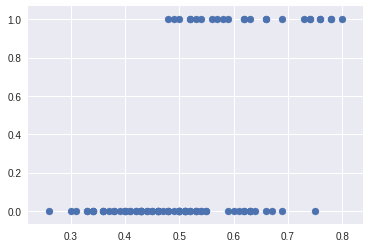

In [7]:
'''
Let's look at some pictures!
'''

# Usually matplotlib uses Tkinter, which doesn't work on notebooks. This "magic
# function" with the % in front of it signals to not use Tkinter.
%matplotlib inline

# We take the first 100 elements of our data and the corresponding 100 answers.
x_plot = data[0:100]
y_plot = answers[0:100]

# Given the ith datapoint, we want to plot datapoint[idx] over 0 or 1 depending
# on if it's red wine or not. (1 is red wine)
idx = 9

# Just going through our data and taking the (idx)th element of each datapoint.
# Again, if idx = 10, it's alcohol, if idx = 7 it's density, etc.
# (Look at the labels when we display the data)
data_plot = [data_point[idx] for data_point in x_plot]

# Just creates a scatter plot. Regular plt.plot(data_plot, y_plot) gives you a
# line graph, which is bad.
plt.scatter(data_plot, y_plot)

## Building A Model

In [0]:
'''
We create a simple Sequential keras model. A Sequential object is the framework
for models in keras. Right now our Sequential model is empty, so it won't do
anything. We'll need to add things into it first.
'''

model = keras.models.Sequential()

In [0]:
'''
A "Dense" object is keras' version of linear regression. But now, since we want
logistic regression, we need to apply the sigmoid function after the linear
regression.

To do this, we set activation = "sigmoid"
'''

# The activation function is what we do after we apply the weighted sum.
# Usually, we just have y = w0x0 + w1x1 + ... + w11x11 + b, but with the activation
# keras does y = sigmoid(w0x0 + w1x1 + ... + w11x11 + b) for us.

# Of course, 'sigmoid' is preprogrammed; and there are a few others, but that's for later
log_regressor = keras.layers.Dense(1, input_shape=(12,), activation='sigmoid')

# Now we add the logistic regression "layer" to our model. It might not make sense
# right now, but remember, keras is designed to do neural networks not just 
# linear or logistic regression. The current keras design allows for generalizations
# of more than one "layer" in a model; we're just not doing any of that.
model.add(log_regressor)

In [0]:
'''
We need to compile a model before we run it. "opt" here is an optimizer, basically
a way of getting better. Here, we let opt = Adam, which stands for Adaptive momentum estimation.
(A Glorified version of Gradient Descent)

lr here means "learning rate." This is the step size of your gradient descent. 
If the model isn't training fast enough, try increasing it. If the model is getting
worse, try decreasing it.

Loss is mean squared error. This is what we try to minimize.
'''
opt = keras.optimizers.Adam(lr = 0.003)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [11]:
'''
The line
--history = model.fit(X, y, epochs = 100)--
stores the history of how the model learned in a variable called history

(Look below for an explanation of the output.)
'''
history = model.fit(data, answers, epochs = 100)

Epoch 1/100
6497/6497 [==============================] - 1s 95us/step - loss: 0.7564 - mean_absolute_error: 0.7601
Epoch 2/100
6497/6497 [==============================] - 0s 30us/step - loss: 0.7539 - mean_absolute_error: 0.7547
Epoch 3/100
6497/6497 [==============================] - 0s 30us/step - loss: 0.7539 - mean_absolute_error: 0.7544
Epoch 4/100
6497/6497 [==============================] - 0s 29us/step - loss: 0.7539 - mean_absolute_error: 0.7543
Epoch 5/100
6497/6497 [==============================] - 0s 28us/step - loss: 0.7539 - mean_absolute_error: 0.7542
Epoch 6/100
6497/6497 [==============================] - 0s 28us/step - loss: 0.7539 - mean_absolute_error: 0.7541
Epoch 7/100
6497/6497 [==============================] - 0s 28us/step - loss: 0.7539 - mean_absolute_error: 0.7541
Epoch 8/100
6497/6497 [==============================] - 0s 28us/step - loss: 0.7539 - mean_absolute_error: 0.7541
Epoch 9/100
6497/6497 [==============================] - 0s 29us/step - loss: 0.

In [0]:
'''
Explanation of the output:

Epoch 24/100
6497/6497 [==============================] - 0s 36us/step - loss: 0.0185 - mean_absolute_error: 0.0308

An epoch is a runthrough of the data. We can see that this is the 24th epoch out of the 100
which it plans to run.

6497 is the total number of examples in our data. To finish an epoch, the model has 
to train on all 6497 datapoints.

loss: 0.0185 This is the average of the squared error for each datapoint. Note that
it uses squared error because we set loss = 'mean_squared_error' when compiling.

mean_absolute_error: 0.0308. This is an error metric we can kinda understand.
On average, it's guesses are around 0.0308 off the right answer.

So, for instance, if the bottle of wine is red wine, on average, it might gueses a 0.97
or a 97% chance that it's red wine.
'''

In [0]:
'''
But so far our model has been doing regression; it only becomes classification
once we decide how to classify things. For our purposes, we set the classification
threshold to be 0.5. If the bottle has a more than 50% chance of being red wine, we 
classify it as red wine. If the bottle has less than a 50% chance of being red wine,
we classify it as white wine.
'''

def classify(model, X):
  # First we run the data through the model to get the probabilities of being red wine
  y = model.predict(X)
  
  # np.rint here stands for "round int". Basically, it takes any decimal and rounds
  # to the nearest integer. So 0.75, for example, goes to 1.
  y_classify = np.rint(y)
  
  # We'll see very soon a visual representation of these results.
  return y_classify

In [14]:
model.get_weights()

[array([[ 0.5677915 ],
        [ 5.723476  ],
        [-2.12247   ],
        [-0.13219377],
        [ 9.313137  ],
        [ 0.03179574],
        [-0.05007028],
        [ 0.3452335 ],
        [ 0.3308507 ],
        [ 4.729049  ],
        [-0.6150977 ],
        [-0.04691073]], dtype=float32), array([-0.22332986], dtype=float32)]

## Displaying Results
Time to see how we're doing!

In [0]:
# Again, this is the "magic function" which enables matplotlib to work in a notebook.
%matplotlib inline

# We'll plot only the first 50 points; plotting all 6500 datapoints will make our
# graphs incomprehendible.
x_subset = data[0:50]
y_subset = answers[0:50]

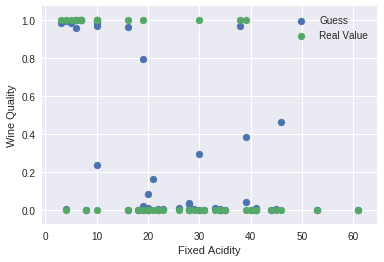

In [16]:
index1 = 5

# Plot the predictions of the model vs the actual answers
y_guess = model.predict(x_subset)

# Here, we extract the feature point which we want to plot against. if index1 = 0,
# for example, then we're plotting y against "fixed_acidity"
x_plot = [data_point[index1] for data_point in x_subset]
# Comprehension questions: why do we need to plot against x_plot, why not plot against x_subset?

# Plot the guesses (blue)
plt.scatter(x_plot, y_guess, label = 'Guess')
# Plot the real values (green)
plt.scatter(x_plot, y_subset, label = 'Real Value')
# Label the plot and make a legend
plt.xlabel('Fixed Acidity')
plt.ylabel('Wine Quality')
plt.legend()

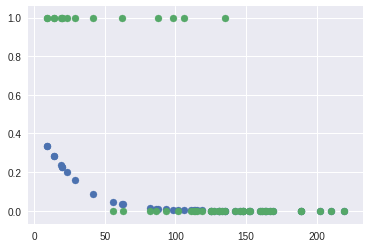

In [22]:
#You can change this around
index2 = 6

# Plot the impact of the different features vs the actual answers
# We do this by setting all features equal to zero except for the one we're interested in
x_input = []

for i in range(len(x_subset)):
  # Create an artificial datapoint with all values = 0
  data_point = [0 for i in range(12)]
  # Set the index2 element to not zero. This will isolate the impact that index2
  # gives us.
  data_point[index2] = x_subset[i][index2]
  x_input.append(data_point)

# Convert to numpy array bc you can only predict on numpy arrays.
x_input = np.array(x_input)

# Strip away all the features except for the one we're interested in.
# (Can't plot a 12-dimensional vector in a 2D plot)
x_plot = [x_input[i][index2] for i in range(len(x_input))]

# Make guesses based on our skewed dataset
y_guess = model.predict(x_input)

# Plot the guesses and the real values.
plt.scatter(x_plot, y_guess) # Guesses = blue
plt.scatter(x_plot, y_subset) # Real values = green

# First note the sigmoid-shaped curve. Why is this?
# Second, does more "fixed acidity" mean white or red wine?

### Plotting Classification
So far, we've only been plotting continuous values; those are easier to graph. Instead, now let's try to plot discrete values.

In [23]:
# Now we can compare our guesses with our answers!
# classify is a function, written above which rounds our probabilities to the
# nearest number. The rounding makes logistic regression "classification".
guesses = classify(model, data)

# Let's just try comparing a few of them.
print(guesses[0:5])
print(answers[0:5])

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [0]:
# Hopefully you're model's doing well!
# Now let's try to plot results over the whole dataset.

ww = 0 #Stands for: white wine, guessed white wine.
rr = 0 #Stands for: red wine, guessed red wine.
wr = 0 #Stands for: white wine, guessed red wine.
rw = 0 #Stands for: red wine, guessed white wine.

for i in range(len(answers)):
  if answers[i][0] == 0 and guesses[i][0] == 0:
    ww += 1
  elif answers[i][0] == 1 and guesses[i][0] == 1:
    rr += 1
  elif answers[i][0] == 0 and guesses[i][0] == 1:
    wr += 1
  else:
    rw += 1

In [25]:
# Let's plot the confusion matrix!

print("        Guesses:   White Wine    Red Wine")
print("Truth")
print("White Wine:           {}            {}".format(ww, wr))
print("Red Wine:             {}            {}".format(rw, rr))

        Guesses:   White Wine    Red Wine
Truth
White Wine:           4842            56
Red Wine:             86            1513


In [0]:
'''
Hopefully things are doing well! This matrix is very useful to plot, and can be 
extended to multi-class classification.
'''

# Breast Cancer Classification
Now try applying implementing it yourself!

## Processing Data

In [0]:
'''
Sklearn is just another machine learning library. We're just stealing it's dataset.
'''

from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()

In [6]:
'''
Let's see what sklearn says about the dataset.
'''
print(breast_cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [0]:
x_bc = breast_cancer['data']
y_bc = breast_cancer['target']

# Just going to normalize our data.
x_bc = keras.utils.normalize(x_bc)

In [27]:

mal = 0
ben = 0
for i in range(len(y_bc)):
  if y_bc[i] == 0:
    ben += 1
  else:
    mal += 1
print(len(y_bc))
print(mal)
print(ben)

569
357
212


## Building A Model
Try building your own model! If you have questions, try refering to the "Building a Model" section in the wine classification step. If you have any more questions, ask Joshua or Oliver!

Disclaimer: keras is a library which does keep many things "under the hood." You just need to follow it's rules, and it'll magically do the Gradient descent stuff for you. The lecture is meant to teach you the intuition behind keras' actions, but the implementation time is meant to show how exactly do you use keras.

The keras documentation is here: [keras.io](https://keras.io)

In [0]:
# Try building your own model!

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape = (30,), activation = 'sigmoid'))

In [0]:
opt = keras.optimizers.Adam(lr = 0.01)
model.compile(optimizer=opt, loss='mse', metrics=['mean_absolute_error'])

## Displaying Results
Now, display whichever results are useful to you. We recommend printing out your confusion matrix first.

In [39]:
history = model.fit(x_bc, y_bc, epochs = 300)

Epoch 1/300
569/569 [==============================] - 0s 719us/step - loss: 0.0513 - mean_absolute_error: 0.1319
Epoch 2/300
569/569 [==============================] - 0s 37us/step - loss: 0.0513 - mean_absolute_error: 0.1322
Epoch 3/300
569/569 [==============================] - 0s 38us/step - loss: 0.0513 - mean_absolute_error: 0.1322
Epoch 4/300
569/569 [==============================] - 0s 41us/step - loss: 0.0512 - mean_absolute_error: 0.1311
Epoch 5/300
569/569 [==============================] - 0s 38us/step - loss: 0.0512 - mean_absolute_error: 0.1314
Epoch 6/300
569/569 [==============================] - 0s 38us/step - loss: 0.0512 - mean_absolute_error: 0.1315
Epoch 7/300
569/569 [==============================] - 0s 35us/step - loss: 0.0512 - mean_absolute_error: 0.1322
Epoch 8/300
569/569 [==============================] - 0s 39us/step - loss: 0.0513 - mean_absolute_error: 0.1324
Epoch 9/300
569/569 [==============================] - 0s 37us/step - loss: 0.0514 - mean_absol

In [42]:
guesses = classify(model, x_bc)
tn = 0 #True negative
tp = 0 #True positive
fp = 0 #False positive
fn = 0 #False negative

for i in range(len(y_bc)):
  if y_bc[i] == 0 and guesses[i][0] == 0:
    tn += 1
  elif y_bc[i] == 1 and guesses[i][0] == 1:
    tp += 1
  elif y_bc[i] == 0 and guesses[i][0] == 1:
    fp += 1
  else:
    fn += 1

print("        Guesses:   Benign    Malignant")
print("Truth")
print("Benign:              {}          {}".format(tn, fp))
print("Malignant:           {}          {}".format(fn, tp))

        Guesses:   Benign    Malignant
Truth
Benign:              186          26
Malignant:           11          346
